## Predictive Modeling: CFPB Consumer Complaints Modeling

#### The goal of the project is to create a predictive model that then predicts which financial services complaints filed with the U.S. Consumer Financial Protection Bureau (CFPB) will ultimately be disputed. The model can help banks identify disputed complaints so that they can conduct additional prudential review and other dispute resolution costs in advance.

##### 1. In the test set (not the entire dataset), what proportion of consumers raised a dispute?

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('shared/complaints_25Nov21.csv')
df = df.fillna('missing')
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-26,Money transfers,International money transfer,Other transaction issues,missing,"To whom it concerns, I would like to file a fo...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",missing,missing,missing,Consent provided,Web,2016-10-29,Closed with explanation,Yes,No,2180490
1,2015-03-27,Bank account or service,Other bank product/service,"Account opening, closing, or management",missing,My name is XXXX XXXX XXXX and huband name is X...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,151XX,Older American,Consent provided,Web,2015-03-27,Closed with explanation,Yes,No,1305453
2,2015-04-20,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",missing,XXXX 2015 : I called to make a payment on XXXX...,Company chooses not to provide a public response,U.S. BANCORP,PA,152XX,missing,Consent provided,Web,2015-04-22,Closed with monetary relief,Yes,No,1337613
3,2013-04-29,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",missing,missing,missing,JPMORGAN CHASE & CO.,VA,22406,Servicemember,missing,Phone,2013-04-30,Closed with explanation,Yes,Yes,393900
4,2013-05-29,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",missing,missing,missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",GA,30044,missing,missing,Referral,2013-05-31,Closed with explanation,Yes,No,418647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207255,2015-05-24,Debt collection,Credit card,Taking/threatening an illegal action,Sued w/o proper notification of suit,missing,missing,JPMORGAN CHASE & CO.,FL,33133,missing,Consent not provided,Web,2015-05-24,Closed with explanation,Yes,No,1390395
207256,2012-01-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",missing,missing,missing,JPMORGAN CHASE & CO.,NY,10312,missing,missing,Referral,2012-01-11,Closed without relief,Yes,Yes,12192
207257,2012-07-17,Student loan,Non-federal student loan,Repaying your loan,missing,missing,missing,"BANK OF AMERICA, NATIONAL ASSOCIATION",NH,032XX,missing,missing,Web,2012-07-18,Closed with explanation,Yes,No,118351
207258,2016-09-29,Bank account or service,Checking account,"Account opening, closing, or management",missing,Near the end of XXXX 2016 I opened a Citigold ...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",CA,900XX,missing,Consent provided,Web,2016-09-29,Closed with non-monetary relief,Yes,No,2138969


In [3]:
# Select the specified columns for the predictors
predictor_columns = ['Product', 'Sub-product', 'Issue', 'State', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']
X = df[predictor_columns]
X

,Product,Sub-product,Issue,State,Tags,Submitted via,Company response to consumer,Timely response?
0,Money transfers,International money transfer,Other transaction issues,missing,missing,Web,Closed with explanation,Yes
1,Bank account or service,Other bank product/service,"Account opening, closing, or management",PA,Older American,Web,Closed with explanation,Yes
2,Bank account or service,Other bank product/service,"Making/receiving payments, sending money",PA,missing,Web,Closed with monetary relief,Yes
3,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",VA,Servicemember,Phone,Closed with explanation,Yes
4,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",GA,missing,Referral,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...
207255,Debt collection,Credit card,Taking/threatening an illegal action,FL,missing,Web,Closed with explanation,Yes
207256,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NY,missing,Referral,Closed without relief,Yes
207257,Student loan,Non-federal student loan,Repaying your loan,NH,missing,Web,Closed with explanation,Yes
207258,Bank account or service,Checking account,"Account opening, closing, or management",CA,missing,Web,Closed with non-monetary relief,Yes


In [4]:
# Set the target variable using 'Consumer disputed?' column and encode it to 0s and 1s
y_variable = 'Consumer disputed?'
le = LabelEncoder()
y = le.fit_transform(df[y_variable])

In [5]:
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

/home/jovyan/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
# Split the data into training and testing sets with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=123)

In [7]:
# Calculate the proportion of disputes in the test set
proportion_disputed = y_test.mean()
print(f"Proportion of consumers who raised a dispute in the test set: {proportion_disputed:.6f}")

Proportion of consumers who raised a dispute in the test set: 0.215864


##### 2. After the random undersampling, what proportion of consumers in the training dataset raised a dispute?

In [8]:
from imblearn.under_sampling import RandomUnderSampler

In [9]:
# Perform random undersampling on the training data
undersampler = RandomUnderSampler(random_state=123)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


In [10]:
# Calculate the proportion of disputes in the undersampled training set
proportion_disputed_under = y_train_under.mean()

print(f"Proportion of consumers who raised a dispute in the undersampled training set: {proportion_disputed_under:.6f}")

Proportion of consumers who raised a dispute in the undersampled training set: 0.500000


##### 3. Fit the XGBClassifier model as described in the instructions, and evaluate it on the test set.  What is the recall for the category 'Consumer disputed?' = 'Yes' on the test set?

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler


In [12]:
# Perform random undersampling on the training data
undersampler = RandomUnderSampler(random_state=123)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [13]:
# Initialize the XGBoost classifier
model_xgb = XGBClassifier(random_state=123)

In [14]:
X_train_under

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [15]:
# Fit the model on the undersampled training data
model_xgb.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [16]:
# Predict on the test set
y_pred = model_xgb.predict(X_test)

# Calculate recall for 'Consumer disputed?' = 'Yes'
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
recall_disputed = report['Yes']['recall']

print(f"Recall for 'Consumer disputed?' = 'Yes': {recall_disputed:.2f}")

Recall for 'Consumer disputed?' = 'Yes': 0.63


              precision    recall  f1-score   support

           0       0.84      0.53      0.65     32504
           1       0.27      0.63      0.38      8948

    accuracy                           0.55     41452
   macro avg       0.55      0.58      0.51     41452
weighted avg       0.72      0.55      0.59     41452

[[17128 15376]
 [ 3302  5646]]


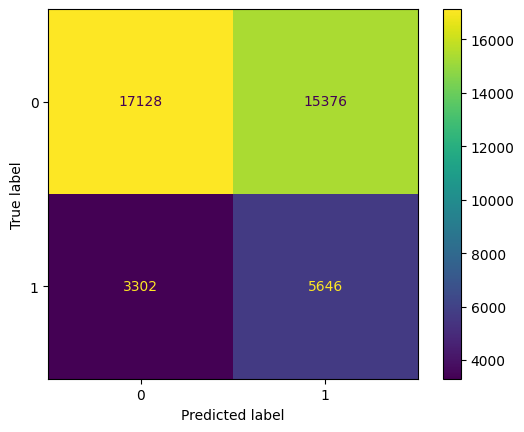

In [17]:
# Print out the classification report, which includes main classification metrics
print(classification_report(y_test, y_pred))
# Print out the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
# Display the confusion matrix using ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test);

##### 4. If there were no model, what would be the total cost to the banks of dealing with the complaints in the test set?

In [18]:
# 1 representing 'disputed' and 0 representing 'not disputed'
# Calculate the number of non-disputed complaints
non_disputed_complaints = (y_test == 0).sum()

# Calculate the number of disputed complaints
disputed_complaints = (y_test == 1).sum()

# Calculate the total cost without a model
total_cost = (non_disputed_complaints * 100) + (disputed_complaints * 600)

print(f"Total cost without a model: ${total_cost}")

Total cost without a model: $8619200


##### 5. Use the predictions for which complaints are likely to be disputed from the model you have created (using the default classification threshold).  Assume that if the model predicts a complaint will be disputed, the banks decide to spend 90 dollar performing extra diligence to avoid the 600 dollar cost of a dispute. 
In this situation based on model results, what would be the total cost to the banks of dealing with the complaints in the test set?



In [19]:
# Predictions from the model
y_pred = model_xgb.predict(X_test)

In [20]:
# Use the values from the confusion matrix
TN = 17353
FP = 15151
TP = 5844
FN = 3104

cost_extra_diligence = 90
cost_dispute = 600
cost_standard = 100
total_cost_with_model = (TP + FP) * (cost_extra_diligence + cost_standard) + FN * cost_dispute + TN * cost_standard

print(f"Total cost with model: ${total_cost_with_model}")

Total cost with model: $7586750


##### 6. The costs to the banks from doing due diligence and from having disputes are asymmetrical.  Therefore you have the opportunity to reduce total cost by varying the probability threshold from the default 0.5 in a binary classification situation as this.

Change the value of the threshold and determine the lowest total cost to the banks based on the observations in the test set.


In [22]:
import numpy as np
# Predict the probabilities for the positive class (class 1)
probs = model_xgb.predict_proba(X_test)[:, 1]

# Define the cost function based on the problem statement
def calculate_cost(threshold, y_true, y_probs):
    y_pred = (y_probs >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return (tp * 190) + (fp * 190) + (tn * 100) + (fn * 600)

# Initialize the minimum cost to a large number and the optimal threshold to None
min_cost = float('inf')
optimal_threshold = None

# Iterate over a range of thresholds to find the one that minimizes the total cost
for threshold in np.linspace(0, 1, 101):
    cost = calculate_cost(threshold, y_test, probs)
    if cost < min_cost:
        min_cost = cost
        optimal_threshold = threshold

# Output the optimal threshold and the corresponding cost
print(f"Optimal threshold: {optimal_threshold}")
print(f"Total cost at optimal threshold: ${min_cost}")


Optimal threshold: 0.44
Total cost at optimal threshold: $7609520
